In [97]:
import pandas as pd
import collections
import matplotlib.pyplot as plt
import recmetrics

from wordcloud import WordCloud

In [98]:
#ANALISIS DEL DATASET RATINGS

In [99]:
#Cargamos el dataset de ratings en un dataframe de pandas
ratings = pd.read_csv('../ml-latest-small/ratings.csv', sep=',', parse_dates=['timestamp'])
ratings.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [100]:
#Tamaño del dataset
ratings.shape

(100836, 4)

In [101]:
#Eliminamos la columna de timestamp ya que no la utilizamos
del ratings['timestamp']

In [102]:
#Verificamos si hay algun valor nulo en el dataset
ratings.isnull().any()

userId     False
movieId    False
rating     False
dtype: bool

In [103]:
usuarios = ratings[['userId','rating']].groupby('userId').count().sort_values('rating', ascending=False)
usuarios

,rating
userId,
414,2698
599,2478
474,2108
448,1864
274,1346
...,...
442,20
569,20
320,20


Text(0.5, 0, 'Usuario')

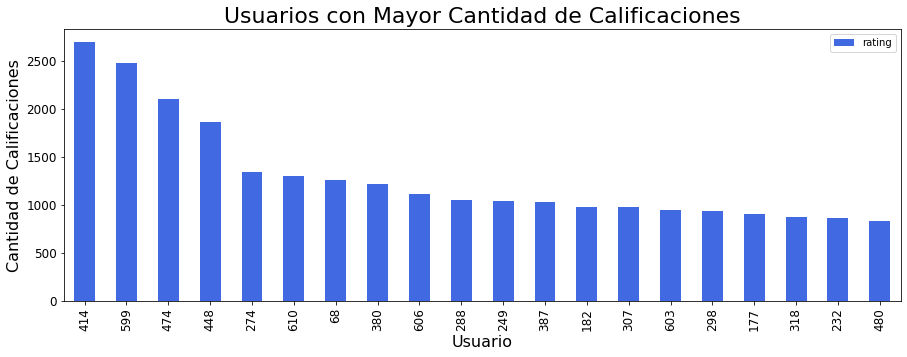

In [104]:
usuarios[:20].plot(kind='bar',figsize=(15,5), color = 'royalblue');
plt.title("Usuarios con Mayor Cantidad de Calificaciones", fontsize=22)
plt.ylabel("Cantidad de Calificaciones", fontsize=16)
plt.xlabel("Usuario", fontsize=16)

In [105]:
#Usuarios con menor cantidad de calificaciones
#Verificamos que todos los usuarios tienen como minimo 20 calificaciones realizadas
usuarios.tail(10)

,rating
userId,
147,20
257,20
406,20
431,20
278,20
442,20
569,20
320,20
576,20


In [106]:
#Realizamos el calculo de los ratings que existen en el dataset y su cantidad de ocurrencias
ratings_count = ratings[['movieId','rating']].groupby('rating').count()
ratings_count

,movieId
rating,
0.5,1370
1.0,2811
1.5,1791
2.0,7551
2.5,5550
3.0,20047
3.5,13136
4.0,26818
4.5,8551


In [107]:
#Calculamos el rating promedio para cada pelicula en base a sus calificaciones
rating_promedio = ratings[['movieId','rating']].groupby('movieId').mean()
rating_promedio

,rating
movieId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429
...,...
193581,4.000000
193583,3.500000
193585,3.500000


In [108]:
#Mostramos las caracteristicas de la columna rating
ratings['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

Text(0.5, 0, 'Calificacion')

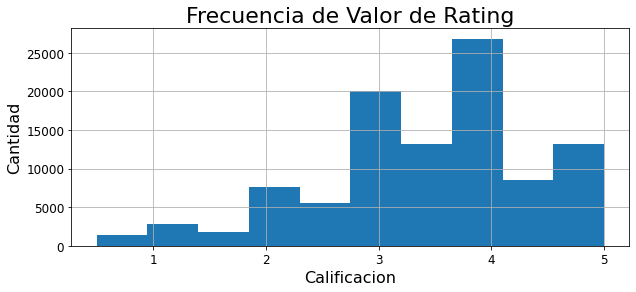

In [109]:
#Histograma de los ratings
ratings.hist(column='rating', figsize=(10,4))
plt.title("Frecuencia de Valor de Rating", fontsize=22)
plt.ylabel("Cantidad", fontsize=16)
plt.xlabel("Calificacion", fontsize=16)


Text(0.5, 0, 'Rating')

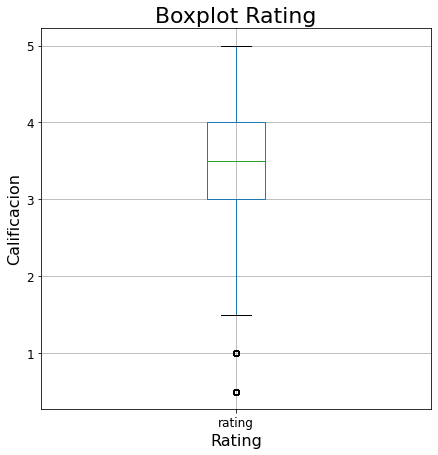

In [110]:
#Realizamos un grafico boxplot con las caracteristicas mostradas en la funcion .describe()
ratings.boxplot(column='rating', figsize=(7,7))
plt.title("Boxplot Rating", fontsize=22)
plt.ylabel("Calificacion", fontsize=16)
plt.xlabel("Rating", fontsize=16)

In [111]:
#ANALISIS DEL DATASET MOVIES

In [112]:
movies = pd.read_csv('../ml-latest-small/movies.csv', sep=',')
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [113]:
#Verificamos si existe algun valor nulo en el dataset
movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [114]:
#Creamos una columna con el año de la pelicula
#Ya que el valor del año se encuentra en el titulo
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)
movies['title'] = movies['title'].str.replace(r'.\((.*)\).*',r'', regex=True)
movies.head(10)

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995
5,6,Heat,Action|Crime|Thriller,1995
6,7,Sabrina,Comedy|Romance,1995
7,8,Tom and Huck,Adventure|Children,1995
8,9,Sudden Death,Action,1995
9,10,GoldenEye,Action|Adventure|Thriller,1995


In [115]:
#Verificamos el tamaño del dataset
movies.shape

(9742, 4)

In [116]:
#Funcion para realizar la separacion de los generos
def Separar_Genero_en_Filas(fila, acumulador_fila, columna, separador):
    fila_separada = fila[columna].split(separador)
    for s in fila_separada:
        nueva_fila = fila.to_dict()
        nueva_fila[columna] = s
        acumulador_fila.append(nueva_fila)


In [117]:
def Separar_Columna_Dataframe(movies, columna, separador):
    acumulador_fila = []
    movies.apply(Separar_Genero_en_Filas,axis=1,args = (acumulador_fila, columna, separador))
    df_separado = pd.DataFrame(acumulador_fila)
    return df_separado

movies_genero_separado = Separar_Columna_Dataframe(movies,"genres","|")

In [118]:
movies_genero_separado.head(10)

,movieId,title,genres,year
0,1,Toy Story,Adventure,1995
1,1,Toy Story,Animation,1995
2,1,Toy Story,Children,1995
3,1,Toy Story,Comedy,1995
4,1,Toy Story,Fantasy,1995
5,2,Jumanji,Adventure,1995
6,2,Jumanji,Children,1995
7,2,Jumanji,Fantasy,1995
8,3,Grumpier Old Men,Comedy,1995
9,3,Grumpier Old Men,Romance,1995


In [119]:
#Buscamos los generos mas calificados
movies_genero_separado.genres.value_counts()

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
Name: genres, dtype: int64

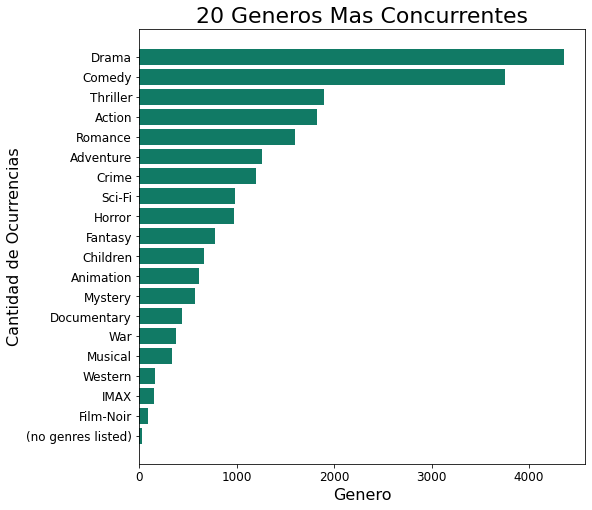

In [120]:
generos = movies_genero_separado.genres
generos_mas_calificados = generos.value_counts(ascending=True)

def Graficar_Barras_Generos(generos_mas_calificados):
    f, ax = plt.subplots(figsize=(8, 8))
    plt.barh(generos_mas_calificados.index, 
             generos_mas_calificados.values,
             color='#117A65')
    plt.rc('xtick', labelsize=12) 
    plt.rc('ytick', labelsize=12) 
    plt.title("20 Generos Mas Concurrentes", fontsize=22)
    plt.ylabel("Cantidad de Ocurrencias", fontsize=16)
    plt.xlabel("Genero", fontsize=16)
    plt.show()
    
Graficar_Barras_Generos(generos_mas_calificados)

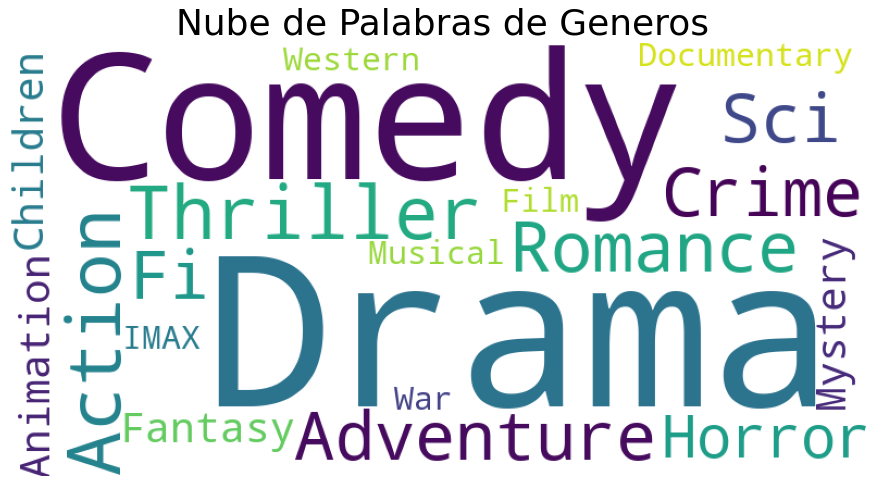

In [121]:
lista_generos = list(movies_genero_separado.genres.value_counts().index)
text = ' '.join(lista_generos)

def Graficar_Nube_Palabras(lista_generos):
    nube_generos = WordCloud(background_color = 'white', max_words=20, scale=2, random_state=1).generate(str(text))
    f, ax = plt.subplots(figsize=(16, 8))
    plt.axis('off')
    plt.imshow(nube_generos)
    plt.title("Nube de Palabras de Generos", fontsize=36)
    plt.show()
    
Graficar_Nube_Palabras(lista_generos)

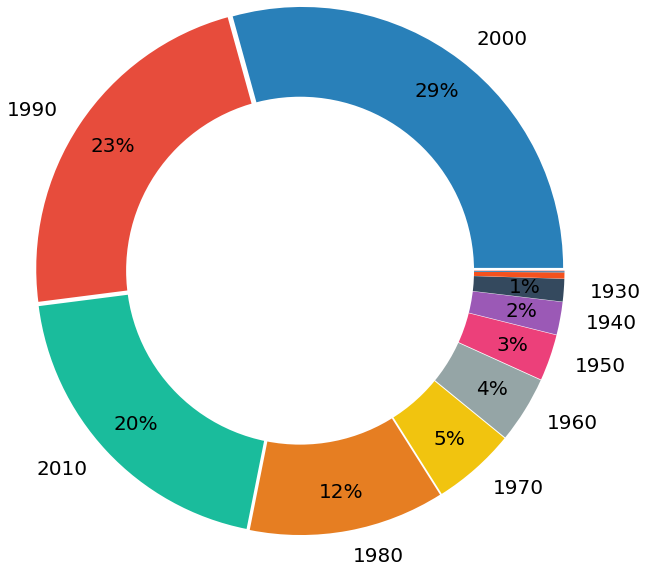

In [122]:
# Grafico de torta de las peliculas por año

def Graficar_Torta(years):
    contador_years = years.value_counts()
    contador_years = contador_years/contador_years.sum()
    
    labels=['' if num<0.01 else str(year) for (year,num) in contador_years.items()]
    explode = [0.02 if contador_years.iloc[i] < 100 else 0.001 for i in range(contador_years.size)]
    colores = ['#2980B9', 
               '#E74C3C', 
               '#1ABC9C', 
               '#E67E22', 
               '#F1C40F', 
               '#95A5A6', 
               '#EC407A', 
               '#9B59B6', 
               '#34495E', 
               '#F4511E']

    f, ax = plt.subplots(figsize=(8, 8))

    plt.pie(contador_years,
            labels=labels,
            autopct=lambda x:'{:1.0f}%'.format(x) if x > 1 else '', 
            explode=explode, 
            colors=colores, 
            radius=1.5, 
            textprops={'fontsize': 20}, 
            pctdistance=0.85, 
            normalize=False)
    

    Graficar_Circulo_Interno()
    plt.show()

def Graficar_Circulo_Interno():
    #Grafica el circulo en el centro de la torta
    centre_circle = plt.Circle((0,0),1,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

def Graficar_Torta_Decadas(movies):
    Graficar_Torta(movies.year.dropna().apply(lambda x:str(int(x[:4])//10*10)))
    
Graficar_Torta_Decadas(movies)

In [123]:
movies_years = movies.year.dropna().apply(lambda x:str(int(x[:4])//10*10))
movies_years.value_counts()

2000    2850
1990    2212
2010    1931
1980    1177
1970     500
1960     401
1950     279
1940     197
1930     136
1920      37
1910       7
1900       3
Name: year, dtype: int64

/home/matias/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


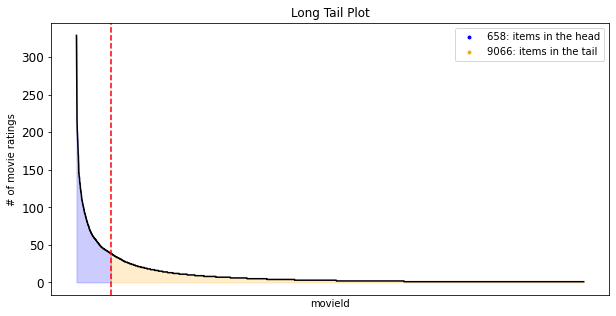

In [131]:
fig = plt.figure(figsize=(10, 5))
recmetrics.long_tail_plot(df=ratings, 
             item_id_column="movieId", 
             interaction_type="movie ratings", 
             percentage=0.5,
             x_labels=False)